In [116]:
pip install sqlalchemy


   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.1 MB ? eta -:--:--
   ------------------------- -------------- 1.3/2.1 MB 3.7 MB/s eta 0:00:01
   ----------------------------------- ---- 1.8/2.1 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sqlalchemy import create_engine

# Define connection string for SQLAlchemy
connection_string = 'mssql+pyodbc://DESKTOP-1RO20BD/Supply_Chain?driver=ODBC+Driver+17+for+SQL+Server'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

# Load data into pandas DataFrames
with engine.connect() as conn:
    df_customer_sales = pd.read_sql('SELECT * FROM Customer_Sales', conn)
    df_inventory_product_details = pd.read_sql('SELECT * FROM InventoryProductDetails', conn)

# Now df_customer_sales and df_inventory_product_details contain the data


In [6]:
df_customer_sales.columns

Index(['Customer_ID', 'Customer_Name', 'Customer_Segment', 'Order_ID',
       'Order_Date_and_Time', 'Delivery_Status', 'Order_Status', 'Type',
       'Market', 'Order_Region', 'Shipping_Mode', 'Shipping_Date',
       'Days_For_Shipment_Scheduled', 'Days_for_shipping_real', 'Latitude',
       'Longitude', 'Product_ID', 'Order_Item_ID', 'Discount_Ratio',
       'Discount_Value', 'Product_Price', 'Profit_Ratio', 'Profit_Per_Item',
       'Quantity', 'Total_With_Discount', 'Sales_Without_Discount'],
      dtype='object')

In [129]:
print("Customer Sales:")
df_customer_sales.head()

Customer Sales:


,Customer_Id,Customer_Name,Customer_Segment,Order_Id,order_date_DateOrders,Delivery_Status,Order_Status,Type,Market,Order_Region,...,Latitude,Longitude,Product_Id,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Order_Item_Total,Sales
0,11599,Mary Malone,Consumer,1,2015-01-01 00:00:00,Advance,Closed,CASH,LATAM,Central America,...,35.776661,-81.362625,957,0.20,1,299.980011,0.37,1,239.979996,299.980011
1,256,David Rodriguez,Consumer,2,2015-01-01 00:21:00,Advance,Pending Payment,PAYMENT,LATAM,South America,...,41.832722,-87.980484,1073,0.03,2,199.990005,0.47,1,193.990005,199.990005
2,256,David Rodriguez,Consumer,2,2015-01-01 00:21:00,Advance,Pending Payment,PAYMENT,LATAM,South America,...,41.832722,-87.980484,502,0.09,3,50.000000,0.30,5,227.500000,250.000000
3,256,David Rodriguez,Consumer,2,2015-01-01 00:21:00,Advance,Pending Payment,PAYMENT,LATAM,South America,...,41.832722,-87.980484,403,0.17,4,129.990005,0.34,1,107.889999,129.990005
4,8827,Brian Wilson,Home Office,4,2015-01-01 01:03:00,Late,Closed,CASH,LATAM,South America,...,29.520010,-98.637413,897,0.18,5,24.990000,0.10,2,40.980000,49.980000


In [130]:

df_inventory_product_details


,Product_Id,Product_Name,Category_Name,Product_Category_Id,Department_Name,Class,order_now,Current_Stock,Reorder_Point,Safety_Stock,Avg_Lead_Time,avg_order_qty,Max_Lead_Time,max_order_qty,mod
0,19,Nike Men's Fingertrap Max Training Shoe,Soccer,2,Fitness,Small Value-Large Number,green,69,35,25,10,1,30,1,True
1,24,Elevation Training Mask 2.0,Soccer,2,Fitness,Small Value-Large Number,orange,175,175,144,10,3,30,5,False
2,35,adidas Brazuca 2014 Official Match Ball,Baseball & Softball,3,Fitness,Small Value-Large Number,green,65,35,25,10,1,30,1,True
3,37,adidas Kids' F5 Messi FG Soccer Cleat,Baseball & Softball,3,Fitness,Small Value-Large Number,green,328,175,146,10,3,30,5,True
4,44,adidas Men's F10 Messi TRX FG Soccer Cleat,Baseball & Softball,3,Fitness,Small Value-Large Number,orange,175,175,145,10,3,30,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1359,Adult dog supplies,Pet Supplies,72,Pet Shop,Small Value-Large Number,green,69,35,25,10,1,30,1,True
114,1360,Smart watch,Sporting Goods,73,Fitness,Small Value-Large Number,orange,35,35,25,10,1,30,1,False
115,1361,Toys,Toys,74,Fan Shop,Small Value-Large Number,green,61,35,25,10,1,30,1,True
116,1362,Fighting video games,Video Games,75,Discs Shop,Small Value-Large Number,orange,35,35,25,10,1,30,1,False


In [20]:
df_inventory_product_details.describe()

,Product_Id,Product_Category_Id,Current_Stock,Reorder_Point,Safety_Stock,Avg_Lead_Time,avg_order_qty,Max_Lead_Time,max_order_qty
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.0,118.000000,118.0,118.000000
mean,689.576271,33.449153,160.720339,110.932203,90.330508,10.0,2.084746,30.0,3.169492
std,403.120380,19.292883,115.003819,70.045617,60.270055,0.0,1.000652,0.0,2.001303
min,19.000000,2.000000,35.000000,35.000000,25.000000,10.0,1.000000,30.0,1.000000
25%,303.500000,17.000000,63.000000,35.000000,25.000000,10.0,1.000000,30.0,1.000000
50%,729.000000,35.000000,175.000000,175.000000,144.000000,10.0,3.000000,30.0,5.000000
75%,905.750000,40.750000,321.000000,175.000000,146.000000,10.0,3.000000,30.0,5.000000
max,1363.000000,76.000000,330.000000,175.000000,148.000000,10.0,3.000000,30.0,5.000000


In [21]:
df_inventory_product_details.isnull().sum()

Product_Id             0
Product_Name           0
Category_Name          0
Product_Category_Id    0
Department_Name        0
Class                  0
order_now              0
Current_Stock          0
Reorder_Point          0
Safety_Stock           0
Avg_Lead_Time          0
avg_order_qty          0
Max_Lead_Time          0
max_order_qty          0
mod                    0
dtype: int64

In [23]:
df_inventory_product_details.dtypes

Product_Id              int64
Product_Name           object
Category_Name          object
Product_Category_Id     int64
Department_Name        object
Class                  object
order_now              object
Current_Stock           int64
Reorder_Point           int64
Safety_Stock            int64
Avg_Lead_Time           int64
avg_order_qty           int64
Max_Lead_Time           int64
max_order_qty           int64
mod                      bool
dtype: object

In [27]:
df_inventory_product_details.nunique()

Product_Id             118
Product_Name           118
Category_Name           50
Product_Category_Id     51
Department_Name         11
Class                    3
order_now                2
Current_Stock           19
Reorder_Point            2
Safety_Stock             7
Avg_Lead_Time            1
avg_order_qty            2
Max_Lead_Time            1
max_order_qty            2
mod                      2
dtype: int64

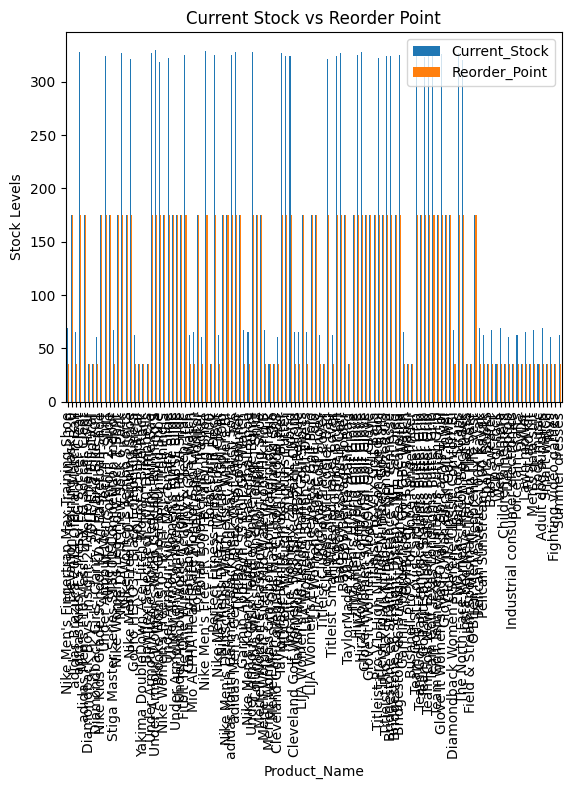

In [31]:
import matplotlib.pyplot as plt

# Bar plot for Current Stock vs Reorder Point
df_inventory_product_details[['Product_Name', 'Current_Stock', 'Reorder_Point']].plot(kind='bar', x='Product_Name')
plt.ylabel('Stock Levels')
plt.title('Current Stock vs Reorder Point')
plt.show()

In [55]:
df_inventory_product_details

,Product_Id,Product_Name,Category_Name,Product_Category_Id,Department_Name,Class,order_now,Current_Stock,Reorder_Point,Safety_Stock,Avg_Lead_Time,avg_order_qty,Max_Lead_Time,max_order_qty,mod
0,19,Nike Men's Fingertrap Max Training Shoe,Soccer,2,Fitness,Small Value-Large Number,green,69,35,25,10,1,30,1,True
1,24,Elevation Training Mask 2.0,Soccer,2,Fitness,Small Value-Large Number,orange,175,175,144,10,3,30,5,False
2,35,adidas Brazuca 2014 Official Match Ball,Baseball & Softball,3,Fitness,Small Value-Large Number,green,65,35,25,10,1,30,1,True
3,37,adidas Kids' F5 Messi FG Soccer Cleat,Baseball & Softball,3,Fitness,Small Value-Large Number,green,328,175,146,10,3,30,5,True
4,44,adidas Men's F10 Messi TRX FG Soccer Cleat,Baseball & Softball,3,Fitness,Small Value-Large Number,orange,175,175,145,10,3,30,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1359,Adult dog supplies,Pet Supplies,72,Pet Shop,Small Value-Large Number,green,69,35,25,10,1,30,1,True
114,1360,Smart watch,Sporting Goods,73,Fitness,Small Value-Large Number,orange,35,35,25,10,1,30,1,False
115,1361,Toys,Toys,74,Fan Shop,Small Value-Large Number,green,61,35,25,10,1,30,1,True
116,1362,Fighting video games,Video Games,75,Discs Shop,Small Value-Large Number,orange,35,35,25,10,1,30,1,False


In [7]:
reorder_needed = df_inventory_product_details[df_inventory_product_details['Current_Stock'] <= df_inventory_product_details['Reorder_Point']]
reorder_needed

,Product_ID,Product_Name,Category_Name,Category_ID,Department_Name,Class,Order_Now,Current_Stock,Reorder_Point,Safety_Stock,Avg_Lead_Time,avg_order_qty,Max_Lead_Time,max_order_qty,mod
1,24,Elevation Training Mask 2.0,Soccer,2,Fitness,Small Value-Large Number,orange,175,175,144,10,3,30,5,False
4,44,adidas Men's F10 Messi TRX FG Soccer Cleat,Baseball & Softball,3,Fitness,Small Value-Large Number,orange,175,175,145,10,3,30,5,False
5,58,Diamondback Boys' Insight 24 Performance Hybr,Basketball,4,Fitness,Small Value-Large Number,orange,35,35,25,10,1,30,1,False
6,60,SOLE E25 Elliptical,Basketball,4,Fitness,Small Value-Large Number,orange,35,35,25,10,1,30,1,False
8,78,Nike Kids' Grade School KD VI Basketball Shoe,Lacrosse,5,Fitness,Small Value-Large Number,orange,175,175,146,10,3,30,5,False
10,116,Nike Men's Comfort 2 Slide,Tennis & Racquet,6,Fitness,Small Value-Large Number,orange,175,175,145,10,3,30,5,False
12,134,Nike Women's Legend V-Neck T-Shirt,Hockey,7,Fitness,Small Value-Large Number,orange,175,175,147,10,3,30,5,False
14,172,Nike Women's Tempo Shorts,Cardio Equipment,9,Footwear,Small Value-Large Number,orange,175,175,147,10,3,30,5,False
17,208,SOLE E35 Elliptical,Strength Training,10,Footwear,Small Value-Large Number,orange,35,35,25,10,1,30,1,False
18,216,Yakima DoubleDown Ace Hitch Mount 4-Bike Rack,Strength Training,10,Footwear,Small Value-Large Number,orange,35,35,25,10,1,30,1,False


In [9]:
no_reorder_needed=df_inventory_product_details.Product_ID.count()- reorder_needed.Product_ID.count()
no_reorder_needed

np.int64(64)

In [11]:
pd.DataFrame(df_inventory_product_details.groupby('Order_Now')['Product_ID'].agg('count'))/df_inventory_product_details.Product_ID.count()*100

,Product_ID
Order_Now,
green,54.237288
orange,45.762712


In [12]:
pd.DataFrame(df_inventory_product_details.groupby('mod')['Product_ID'].agg('count'))/df_inventory_product_details.Product_ID.count()*100

,Product_ID
mod,
False,45.762712
True,54.237288


In [14]:
pd.DataFrame(df_inventory_product_details.groupby('Class')['Product_ID'].agg('count'))/df_inventory_product_details.Product_ID.count()*100

,Product_ID
Class,
High Value-Small Number,3.389831
Moderate Value-Moderate Number,2.542373
Small Value-Large Number,94.067797


In [135]:
pd.DataFrame(df_inventory_product_details.groupby('Category_Name')['Product_ID'].agg('count'))/df_inventory_product_details.Product_ID.count()*100

,Product_Id
Category_Name,
Accessories,5.084746
As Seen on TV!,0.847458
Baby,0.847458
Baseball & Softball,2.542373
Basketball,2.542373
Books,0.847458
Boxing & MMA,2.542373
CDs,0.847458
Cameras,0.847458


In [21]:
df_customer_sales.columns

Index(['Customer_ID', 'Customer_Name', 'Customer_Segment', 'Order_ID',
       'Order_Date_and_Time', 'Delivery_Status', 'Order_Status', 'Type',
       'Market', 'Order_Region', 'Shipping_Mode', 'Shipping_Date',
       'Days_For_Shipment_Scheduled', 'Days_for_shipping_real', 'Latitude',
       'Longitude', 'Product_ID', 'Order_Item_ID', 'Discount_Ratio',
       'Discount_Value', 'Product_Price', 'Profit_Ratio', 'Profit_Per_Item',
       'Quantity', 'Total_With_Discount', 'Sales_Without_Discount'],
      dtype='object')

In [20]:
df_grouped = df_customer_sales.groupby('Order_ID')[['Profit_Per_Item']].sum()
df_grouped['Profit_Per_Item'].sum()

np.float64(3966902.9739931)

In [22]:

# Grouping by 'Order_ID' and summing sales and profit for each order
df_grouped = df_customer_sales.groupby('Order_ID')[['Product_Price', 'Profit_Per_Item']].sum()

# Calculate the correlation between sales and profit after grouping by Order_ID
correlation = df_grouped['Product_Price'].corr(df_grouped['Profit_Per_Item'])

print(f"Correlation between Sales and Profit grouped by Order ID: {correlation}")


Correlation between Sales and Profit grouped by Order ID: 0.16917083176626527


In [23]:
df_negative_profit = df_grouped[df_grouped['Profit_Per_Item'] <= 0]
df_negative_profit

,Product_Price,Profit_Per_Item
Order_ID,,
8,219.960003,-39.669994
15,741.950018,-531.709997
19,699.960022,-496.629974
24,629.970016,-295.550004
25,399.980011,0.000000
...,...,...
77192,215.820007,-301.070007
77195,215.820007,-51.799999
77196,215.820007,-48.779999


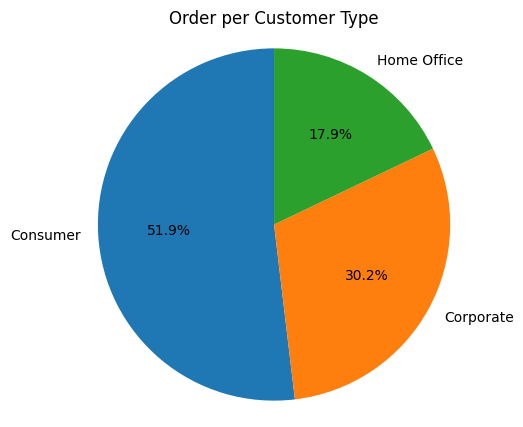

In [24]:
import matplotlib.pyplot as plt

# Group by 'Customer_Segment' and count unique 'Order_ID'
sales_by_customer_type = df_customer_sales.groupby('Customer_Segment')['Order_ID'].nunique()

# Plot the pie chart
plt.figure(figsize=(5, 5))  # Adjust the figure size for better visibility
plt.pie(sales_by_customer_type, 
        labels=sales_by_customer_type.index,  # Use the index as the labels
        autopct='%1.1f%%', 
        startangle=90)

# Title and formatting
plt.title('Order per Customer Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


In [98]:
sales_by_customer_type

Customer_Segment
Consumer       34119
Corporate      19856
Home Office    11777
Name: Order_Id, dtype: int64

In [25]:
# Calculate the number of unique orders by 'Customer_Segment' and 'Type'
Segment = df_customer_sales.groupby(['Customer_Segment', 'Type'])['Order_ID'].nunique().reset_index()

# Calculate the total number of unique orders
total_unique_orders = df_customer_sales['Order_ID'].nunique()

# Divide by the total to get the proportion
Segment['Percentage'] = Segment['Order_ID'] / total_unique_orders*100

# Display the result
Segment


,Customer_Segment,Type,Order_ID,Percentage
0,Consumer,CASH,3704,5.633289
1,Consumer,DEBIT,13207,20.086081
2,Consumer,PAYMENT,7880,11.984426
3,Consumer,TRANSFER,9328,14.186641
4,Corporate,CASH,2246,3.415866
5,Corporate,DEBIT,7607,11.569230
6,Corporate,PAYMENT,4495,6.836294
7,Corporate,TRANSFER,5508,8.376932
8,Home Office,CASH,1299,1.975605
9,Home Office,DEBIT,4526,6.883441


In [26]:
df_customer_sales.columns

Index(['Customer_ID', 'Customer_Name', 'Customer_Segment', 'Order_ID',
       'Order_Date_and_Time', 'Delivery_Status', 'Order_Status', 'Type',
       'Market', 'Order_Region', 'Shipping_Mode', 'Shipping_Date',
       'Days_For_Shipment_Scheduled', 'Days_for_shipping_real', 'Latitude',
       'Longitude', 'Product_ID', 'Order_Item_ID', 'Discount_Ratio',
       'Discount_Value', 'Product_Price', 'Profit_Ratio', 'Profit_Per_Item',
       'Quantity', 'Total_With_Discount', 'Sales_Without_Discount'],
      dtype='object')

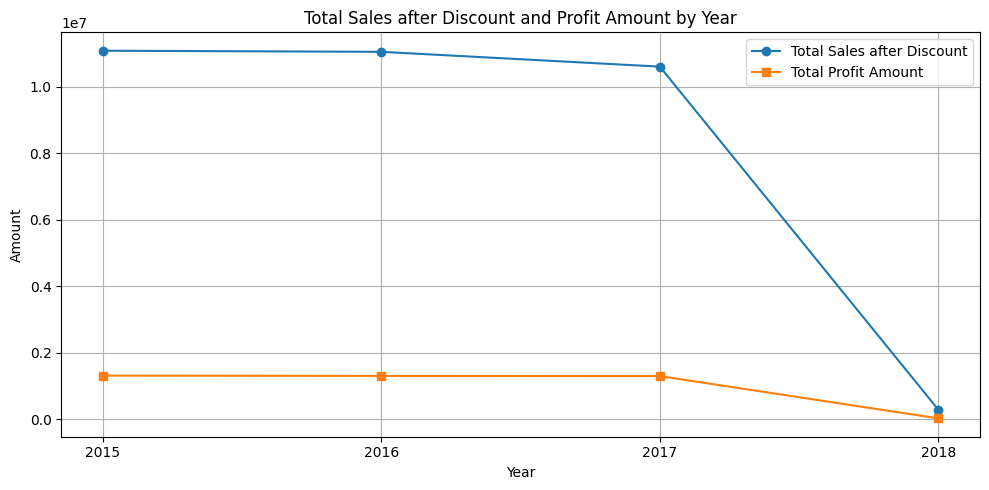

In [28]:
# Ensure the 'order_date_DateOrders' column is in datetime format
df_customer_sales['Order_Date_and_Time'] = pd.to_datetime(df_customer_sales['Order_Date_and_Time'])

# Extract the year from the date column
df_customer_sales['Year'] = df_customer_sales['Order_Date_and_Time'].dt.year

# Group by year and sum Total_With_Discount and Profit_Per_Item
Groupby_year = df_customer_sales.groupby('Year').agg(
    Total_With_Discount=('Total_With_Discount', 'sum'),
    Total_Profit_Per_Item=('Profit_Per_Item', 'sum')
).reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(Groupby_year['Year'], Groupby_year['Total_With_Discount'], marker='o', label='Total Sales after Discount')  # Line chart for Total_With_Discount
plt.plot(Groupby_year['Year'], Groupby_year['Total_Profit_Per_Item'], marker='s', label='Total Profit Amount')  # Line chart for Profit_Per_Item

# Adding titles and labels
plt.title('Total Sales after Discount and Profit Amount by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.xticks(Groupby_year['Year'])  # Ensure all years are shown on the x-axis
plt.legend()  # Show legend for clarity
plt.grid()  # Optional: add a grid for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [31]:

# Grouping by 'Order_ID' and summing sales and profit for each order
df_grouped = df_customer_sales.groupby('Order_ID')[['Discount_Ratio', 'Profit_Ratio']].sum()

# Calculate the correlation between sales and profit after grouping by Order_ID
correlation = df_grouped['Discount_Ratio'].corr(df_grouped['Profit_Ratio'])

print(f"Correlation between Sales and Profit grouped by Order ID: {correlation}")


Correlation between Sales and Profit grouped by Order ID: 0.15035180900661235


In [17]:
Shipping_Mode = df_customer_sales.groupby('Shipping_Mode')['Order_ID'].nunique().reset_index()
Shipping_Mode

,Shipping_Mode,Order_Id
0,First Class,10079
1,Same Day,3571
2,Second Class,12778
3,Standard Class,39324


In [32]:
df_inventory_product_details.columns


Index(['Product_ID', 'Product_Name', 'Category_Name', 'Category_ID',
       'Department_Name', 'Class', 'Order_Now', 'Current_Stock',
       'Reorder_Point', 'Safety_Stock', 'Avg_Lead_Time', 'avg_order_qty',
       'Max_Lead_Time', 'max_order_qty', 'mod'],
      dtype='object')

In [33]:
df_customer_sales.columns

Index(['Customer_ID', 'Customer_Name', 'Customer_Segment', 'Order_ID',
       'Order_Date_and_Time', 'Delivery_Status', 'Order_Status', 'Type',
       'Market', 'Order_Region', 'Shipping_Mode', 'Shipping_Date',
       'Days_For_Shipment_Scheduled', 'Days_for_shipping_real', 'Latitude',
       'Longitude', 'Product_ID', 'Order_Item_ID', 'Discount_Ratio',
       'Discount_Value', 'Product_Price', 'Profit_Ratio', 'Profit_Per_Item',
       'Quantity', 'Total_With_Discount', 'Sales_Without_Discount', 'Year'],
      dtype='object')

In [35]:
merged_df = pd.merge(df_inventory_product_details, df_customer_sales, on='Product_ID')

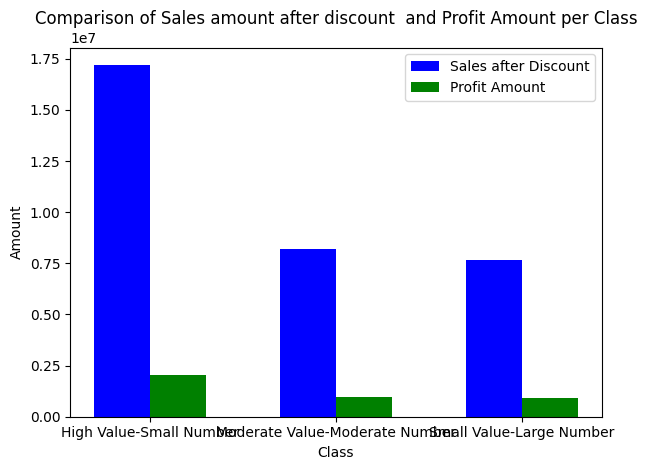

In [37]:
# Aggregating the data by Class
agg_data = merged_df.groupby('Class').agg({'Total_With_Discount': 'sum', 'Profit_Per_Item': 'sum'}).reset_index()

# Creating the bar chart
bar_width = 0.30
x = range(len(agg_data))

# Creating the bar plots
plt.bar(x, agg_data['Total_With_Discount'], width=bar_width, label='Sales after Discount', color='blue', align='center')
plt.bar([p + bar_width for p in x], agg_data['Profit_Per_Item'], width=bar_width, label='Profit Amount', color='green', align='center')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Comparison of Sales amount after discount  and Profit Amount per Class')
plt.xticks([p + bar_width / 2 for p in x], agg_data['Class'])
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [38]:
Order_Count=merged_df['Order_ID'].nunique()
Order_Count

65752

In [39]:
# Group by 'Class' and aggregate
Classss = merged_df.groupby('Class').agg(
    Order_Count=('Order_ID', 'count'),  # Count unique Order_ID
    Total_Quantity=('Quantity', 'sum') , #Sum of Quantity
    Total_Profit_Per_Item=('Profit_Per_Item', 'sum'),  # Sum of Profit_Per_Item
    Total_With_Discount=('Total_With_Discount', 'sum')  # Sum of Total_With_Discount
).reset_index()

# Set display format for float numbers
pd.options.display.float_format = '{:,.2f}'.format

Classss

,Class,Order_Count,Total_Quantity,Total_Profit_Per_Item,Total_With_Discount
0,High Value-Small Number,67738,141432,"2,057,420.45","17,196,592.58"
1,Moderate Value-Moderate Number,58781,100702,"986,400.22","8,212,721.01"
2,Small Value-Large Number,54000,141945,"923,082.30","7,645,088.79"


In [25]:
Groupby_Market2 = df_customer_sales.groupby('Market')['Order_ID'].nunique().reset_index()
Groupby_Market2

,Market,Order_Id
0,Africa,3854
1,Europe,18561
2,LATAM,17181
3,Pacific Asia,17577
4,USCA,8579


In [40]:
Groupby_Market = merged_df.groupby('Market').agg(
    Total_Quantity=('Quantity', 'sum') ,
    Total_Profit_Per_Item=('Profit_Per_Item', 'sum'),
    Total_With_Discount=('Total_With_Discount', 'sum')).reset_index()
Groupby_Market

,Market,Total_Quantity,Total_Profit_Per_Item,Total_With_Discount
0,Africa,25603,"252,071.18","2,061,679.39"
1,Europe,105238,"1,169,442.96","9,769,198.32"
2,LATAM,112942,"1,123,321.61","9,235,762.09"
3,Pacific Asia,83680,"857,753.44","7,434,262.65"
4,USCA,56616,"564,313.78","4,553,499.92"


In [42]:
df_customer_sales['Month'] = df_customer_sales['Order_Date_and_Time'].dt.month

In [43]:
df_customer_sales['Day_Name'] = df_customer_sales['Order_Date_and_Time'].dt.day_name()

In [44]:
df_customer_sales['Order_Hour'] = df_customer_sales['Order_Date_and_Time'].dt.hour

In [46]:
# Save DataFrames to CSV
df_customer_sales.to_csv(r'D:\customer_sales.csv', index=False)
df_inventory_product_details.to_csv(r'D:\inventory_product_details.csv', index=False)